# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



In [4]:
import pandas as pd
import numpy as np
mindb=pd.read_csv('mindtree_bollinger.csv')
mindb.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Deliverable Qty,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Per_Change,Trend,upper band,lower band,middle band
0,2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,...,100362,36.90,2017,5,509.450000,0.000000,Slight or No change,NaN,NaN,NaN
1,2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,...,82090,39.65,2017,5,510.249582,0.363137,Slight or No change,NaN,NaN,NaN
2,2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,...,150098,38.35,2017,5,508.495948,-0.968120,Slight negative,NaN,NaN,NaN
3,2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,...,170919,20.05,2017,5,500.779579,-2.656265,Negative,NaN,NaN,NaN
4,2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,...,57853,16.42,2017,5,500.222798,0.933252,Slight positive,NaN,NaN,NaN


In [5]:
mindb['Date']=mindb['Date'].astype('datetime64[ns]')

### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [6]:
def assign (mindb):
    if mindb['Close Price']<mindb['lower band']:
        return('Buy')
    elif (mindb['Close Price']>mindb['lower band']) and (mindb['Close Price']<mindb['middle band']):
        return('Hold Buy/Liquidate Short')
    elif (mindb['Close Price']<mindb['upper band']) and (mindb['Close Price']>mindb['middle band']):
        return('Hold Short/ Liquidate Buy')
    elif mindb['Close Price']>mindb['lower band']:
        return('Short')
    else:
        return('NaN')
    
mindb['Call']=mindb.apply(assign,axis=1)
mindb.head()

,Date,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,Year,Month,VWAP,Day_Per_Change,Trend,upper band,lower band,middle band,Call
0,2017-05-15,MINDTREE,EQ,510.60,507.35,515.00,505.90,510.50,509.45,510.39,...,36.90,2017,5,509.450000,0.000000,Slight or No change,NaN,NaN,NaN,NaN
1,2017-05-16,MINDTREE,EQ,509.45,507.00,515.85,506.00,511.00,511.30,512.69,...,39.65,2017,5,510.249582,0.363137,Slight or No change,NaN,NaN,NaN,NaN
2,2017-05-17,MINDTREE,EQ,511.30,507.05,519.70,502.75,504.00,506.35,512.10,...,38.35,2017,5,508.495948,-0.968120,Slight negative,NaN,NaN,NaN,NaN
3,2017-05-18,MINDTREE,EQ,506.35,502.00,516.75,486.00,487.50,492.90,505.60,...,20.05,2017,5,500.779579,-2.656265,Negative,NaN,NaN,NaN,NaN
4,2017-05-19,MINDTREE,EQ,492.90,491.95,502.95,489.50,495.15,497.50,496.43,...,16.42,2017,5,500.222798,0.933252,Slight positive,NaN,NaN,NaN,NaN


### Query 4.1b
Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each)

In [8]:
from sklearn.model_selection import train_test_split
filtered_mindb=mindb.dropna()
cols=['Close Price','upper band','middle band','lower band']
feature=filtered_mindb[cols]
target=filtered_mindb.Call
x_train, x_test, y_train, y_test = train_test_split(feature,target,test_size=0.2,random_state=1,stratify=target)

In [14]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('K Nearest Neighbors ')
knn.score(x_test,y_test)

K Nearest Neighbors 


0.8350515463917526

In [15]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(max_depth=10,random_state=1)
dt.fit(x_train,y_train)
pred=dt.predict(x_test)
print('Decision Tree ')
dt.score(x_test,y_test)

Decision Tree 


0.7835051546391752

In [17]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=10,random_state=1)
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('Random forest')
rf.score(x_test,y_test)

Random forest


0.865979381443299

In [18]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(random_state=1)
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('Logistic Regression')
lr.score(x_test,y_test)

Logistic Regression


0.9175257731958762

### Query 4.1c
Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [19]:
rl=pd.read_csv('RELIANCE.csv')
rl.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RELIANCE,EQ,15-May-2017,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12
1,RELIANCE,EQ,16-May-2017,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80
2,RELIANCE,EQ,17-May-2017,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47
3,RELIANCE,EQ,18-May-2017,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85
4,RELIANCE,EQ,19-May-2017,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32


In [20]:
rl['Date']=rl['Date'].astype('datetime64[ns]')
rl['upper band']=(rl['Close Price'].rolling(14).mean()) + (2* (rl['Close Price'].rolling(14).std()))
rl['lower band']=(rl['Close Price'].rolling(14).mean()) - (2* (rl['Close Price'].rolling(14).std()))
rl['middle band']=rl['Close Price'].rolling(14).mean()
rl.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper band,lower band,middle band
0,RELIANCE,EQ,2017-05-15,1350.45,1356.40,1356.40,1333.50,1343.60,1344.10,1344.22,1540213,2.070379e+09,75812,802733,52.12,NaN,NaN,NaN
1,RELIANCE,EQ,2017-05-16,1344.10,1346.05,1376.90,1341.00,1356.20,1356.30,1360.59,2892947,3.936121e+09,79767,1238129,42.80,NaN,NaN,NaN
2,RELIANCE,EQ,2017-05-17,1356.30,1353.00,1365.95,1347.75,1350.00,1353.10,1354.16,2250304,3.047263e+09,56277,1225837,54.47,NaN,NaN,NaN
3,RELIANCE,EQ,2017-05-18,1353.10,1340.25,1350.00,1324.10,1327.45,1327.35,1336.14,2237916,2.990178e+09,84723,1339478,59.85,NaN,NaN,NaN
4,RELIANCE,EQ,2017-05-19,1327.35,1333.00,1335.70,1310.00,1318.20,1318.85,1321.99,2928883,3.871940e+09,115988,1444387,49.32,NaN,NaN,NaN


In [21]:
filtered_rl=rl.dropna()
test=filtered_rl[cols]

In [22]:
pred_knn=knn.predict(test)
pred_lr=lr.predict(test)
pred_dt=dt.predict(test)
pred_rf=rf.predict(test)

In [23]:
filtered_rl['knn call']=pred_knn
filtered_rl['rf call']=pred_rf
filtered_rl['lr call']=pred_lr
filtered_rl['dt call']=pred_dt
filtered_rl.head()

/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper band,lower band,middle band,knn call,rf call,lr call,dt call
13,RELIANCE,EQ,2017-06-01,1340.70,1332.70,1340.00,1323.00,1329.85,1328.25,1329.31,...,79314,1229535,56.42,1374.066261,1290.512310,1332.289286,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy
14,RELIANCE,EQ,2017-06-02,1328.25,1335.00,1338.70,1317.00,1322.90,1324.75,1326.29,...,92530,1625375,61.86,1372.279297,1289.534988,1330.907143,Hold Buy/Liquidate Short,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy
15,RELIANCE,EQ,2017-06-05,1324.75,1326.25,1341.00,1315.85,1330.00,1329.35,1328.64,...,77234,1452622,58.65,1367.686657,1290.277629,1328.982143,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy
16,RELIANCE,EQ,2017-06-06,1329.35,1333.95,1333.95,1311.00,1312.50,1312.80,1320.16,...,61140,1301049,59.34,1363.035160,1289.171983,1326.103571,Hold Buy/Liquidate Short,Hold Short/ Liquidate Buy,Hold Buy/Liquidate Short,Hold Short/ Liquidate Buy
17,RELIANCE,EQ,2017-06-07,1312.80,1311.20,1342.00,1309.00,1339.00,1339.00,1328.04,...,102403,1465014,57.23,1364.507726,1289.363703,1326.935714,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy,Hold Short/ Liquidate Buy


### Query 4.2
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.
Import the stock data file of your choice

In [24]:
df=pd.read_csv('MARUTI.csv')
df['Date']=df['Date'].astype('datetime64[ns]')
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01
1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97
2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37
3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44
4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49


### Query 4.2a
Define 4 new columns , whose values are: 

>% change between Open and Close price for the day 

>% change between Low and High price for the day 

>5 day rolling mean of the day to day % change in Close Price 

>5 day rolling std of the day to day % change in Close Price

In [29]:
df['Open Close %Change']=((df['Close Price'] - df['Open Price'])/(df['Open Price']))*100
df['Low High %Change']=((df['High Price']-df['Low Price'])/(df['Low Price']))*100
df['Close Mean']=df['Close Price'].pct_change().rolling(5).mean()
df['Close std']=df['Close Price'].pct_change().rolling(5).std()
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open Close %Change,Low High %Change,Close Mean,Close std
0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,0.954227,1.569032,NaN,NaN
1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,1.517518,2.160322,NaN,NaN
2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,0.117986,1.352774,NaN,NaN
3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,-1.261148,1.959806,NaN,NaN
4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,-0.937299,3.023963,NaN,NaN


### Query 4.2b
Create a new column 'Action' whose values are:

>1 if next day's price(Close) is greater than present day's. 

>(-1) if next day's price(Close) is less than present day's. 

i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ] 

i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

In [85]:
for i in df.index-1:
    if df['Close Price'].iloc[i+1]>df['Close Price'].iloc[i]:
        df['Action'].iloc[i]=int(1)
    elif df['Close Price'].iloc[i+1]<df['Close Price'].iloc[i]:
        df['Action'].iloc[i]=int(-1)
df.head()

/opt/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,Open Close %Change,Low High %Change,Close Mean,Close std,Action
0,MARUTI,EQ,2017-05-15,6730.20,6759.4,6839.10,6733.45,6824.0,6823.90,6796.84,336356,2.286158e+09,31377,154743,46.01,0.954227,1.569032,NaN,NaN,1
1,MARUTI,EQ,2017-05-16,6823.90,6850.0,6977.55,6830.00,6968.4,6953.95,6902.22,707624,4.884174e+09,49047,360641,50.97,1.517518,2.160322,NaN,NaN,1
2,MARUTI,EQ,2017-05-17,6953.95,6950.0,6979.00,6885.85,6945.0,6958.20,6931.60,445461,3.087758e+09,65280,260033,58.37,0.117986,1.352774,NaN,NaN,-1
3,MARUTI,EQ,2017-05-18,6958.20,6918.3,6948.00,6814.45,6822.0,6831.05,6869.68,406814,2.794684e+09,37063,188907,46.44,-1.261148,1.959806,NaN,NaN,-1
4,MARUTI,EQ,2017-05-19,6831.05,6854.8,6893.90,6691.55,6756.3,6790.55,6791.60,552223,3.750475e+09,64293,234662,42.49,-0.937299,3.023963,NaN,NaN,-1


### Query 4.2c
Construct a classification model with the 4 new inputs and 'Action' as target

In [97]:
new=df.dropna()
col=['Open Close %Change','Low High %Change','Close Mean','Close std']
x=new[col]
y=new['Action']
rand=RandomForestClassifier(max_depth=10,random_state=1)
rand.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

### Query 4.2d
Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model

In [98]:
p=rand.predict(x)
rand.score(x,y)

0.9429735234215886

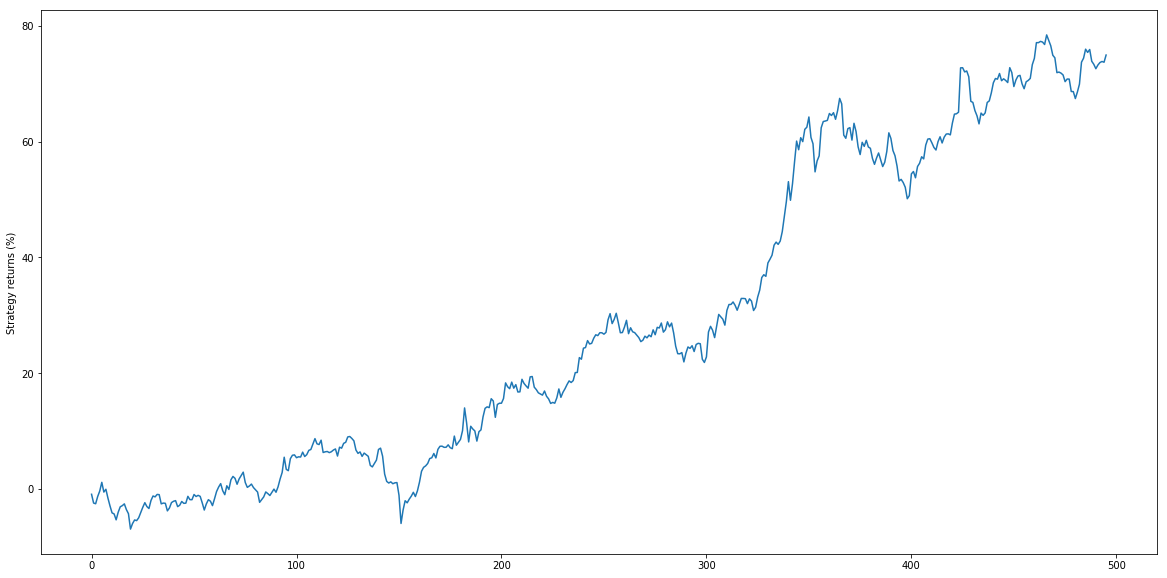

In [104]:
import matplotlib.pyplot as plt
df['Net Cummulative Returns'] = (((df['Open Price'] - df['Close Price'])/(df['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.ylabel('Strategy returns (%)')
plt.plot(df['Net Cummulative Returns'])